# Introduction & Abstract

Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale. It currently covers more than 81,000 cities and 191 countries worldwide. The company's name comes from "air mattress B&B.”

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019. This public dataset is part of Airbnb, and the original source can be found on this website.

ETL Process

In computing, extract, transform, load (ETL) is the general procedure of copying data from one or more sources into a destination system which represents the data differently from the source(s) or in a different context than the source(s). The ETL process became a popular concept in the 1970s and is often used in data warehousing.

Data extraction involves extracting data from homogeneous or heterogeneous sources; data transformation processes data by data cleansing and transforming them into a proper storage format/structure for the purposes of querying and analysis; finally, data loading describes insertion of data into the last target database such as an working data store, a data mart, data lake or a data warehouse.

In our case we are going to use a well-formed CSV file provided by Kaggle then we'll extract all the needed data, transform and clean the raw data to improve quality of this dataset and finally load this data through data science tool like Pandas (open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language) to Python data structures such a lists, tuples, dictionaries...

Extraction

The first part of an ETL process involves extracting the data from the source system(s). In many cases, this represents the most important aspect of ETL, since extracting data correctly sets the stage for the success of subsequent processes. Most data-warehousing projects combine data from different source systems. Each separate system may also use a different data organization and/or format.

An intrinsic part of the extraction involves data validation to confirm whether the data pulled from the sources has the correct/expected values in a given domain (such as a pattern/default or list of values). If the data fails the validation rules, it is rejected entirely or in part. The rejected data is ideally reported back to the source system for further analysis to identify and to rectify the incorrect records.

In this section, we are going to introduce all needed files (in this case, it's going to be a CSV file) where we can find the facts to work with so let's extract our raw data. Before start we have to import the required libraries and frameworks in order to make this IPython Notebook works !

# Importing Packages

In [1]:
'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O (e.g. pd.read_csv)

'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib

plt.style.use('fivethirtyeight')
%matplotlib inline

'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

Load

Loading data into the target data warehouse database is the last step of the ETL process. In a typical Data warehouse, huge volume of data needs to be loaded in a relatively short period (nights). Hence, load process should be optimized for performance.

Types of Loading:

Initial Load — populating all the Data Warehouse tables
Incremental Load — applying ongoing changes as when needed periodically.
Full Refresh —erasing the contents of one or more tables and reloading with fresh data.
In our case, we'll use the Initial Load since we just have one data source, in this case it's a dataset in a CSV format. So on... we are going to read the complete CSV file to work with all this data as we said early.

In [2]:
'''Read in airbnb from csv file'''
airbnb=pd.read_csv('AB_NYC_2019.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
airbnb.shape

(48895, 16)

In [11]:
airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


Transformation & Cleaning


Checking for null values in the Airbnb dataset

In [12]:
airbnb.isnull().sum().sort_values(ascending=False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [13]:
# Method allows the user to analyze and drop Rows/Columns with Null values in different ways
# airbnb.dropna()

REPLACE_NAME_VALUE = "$"
REPLACE_HOST_NAME_VALUE = "#"

# Fill NA/NaN values using the specified method.
airbnb['name'].fillna(REPLACE_NAME_VALUE, inplace=True)           
airbnb['host_name'].fillna(REPLACE_HOST_NAME_VALUE, inplace=True)

# Dropping the column last review as more than 10,000 data points contains null values.
airbnb.drop(['last_review'], axis=1, inplace=True)
airbnb.drop(['reviews_per_month'], axis=1, inplace=True)

Filter rows using Pandas chaining

In [14]:
print("Length of Airbnb DataFrame that match with Name = \"{}\": {}".format(REPLACE_NAME_VALUE, len(airbnb[airbnb.name == REPLACE_NAME_VALUE])))
print("Length of Airbnb DataFrame that match with Host_Name = \"{}\": {}".format(REPLACE_HOST_NAME_VALUE, len(airbnb[airbnb.host_name == REPLACE_HOST_NAME_VALUE])))

Length of Airbnb DataFrame that match with Name = "$": 16
Length of Airbnb DataFrame that match with Host_Name = "#": 21


In [15]:
'''Show the first 5 rows in airbnb dataset'''
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


Understanding our Data

Dataframe Length and shape

In [16]:
len(airbnb.index)    # airbnb.index more faster than airbnb

48895

In [17]:
airbnb.shape

(48895, 14)

Retrieves rows based on index label

In [18]:
airbnb.loc[0]

id                                                              2539
name                              Clean & quiet apt home by the park
host_id                                                         2787
host_name                                                       John
neighbourhood_group                                         Brooklyn
neighbourhood                                             Kensington
latitude                                                    40.64749
longitude                                                  -73.97237
room_type                                               Private room
price                                                            149
minimum_nights                                                     1
number_of_reviews                                                  9
calculated_host_listings_count                                     6
availability_365                                                 365
Name: 0, dtype: object

In [19]:
# airbnb.dtypes
airbnb.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  calculated_host_listings_count  

In [20]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


Analysis

Data analysis is a process of inspecting, cleansing, transforming and modeling data with the goal of discovering useful information, informing conclusions and supporting decision-making. Data analysis has multiple facets and approaches, encompassing diverse techniques under a variety of names, and is used in different business, science, and social science domains. In today's business world, data analysis plays a role in making decisions more scientific and helping businesses run more effectively. We'll outline the 3 main types of data analytics: Descriptive Analysis, Diagnostic Analysis & Predictive Analysis.

Descriptive Analysis

Descriptive analytics are the backbone of reporting—it's impossible to have BI tools and dashboards without it. It addresses your basic "HOW MANY", "WHEN", "WHERE", and "WHAT" questions. Once again, this can be further separated into two categories: ad hoc reporting and canned reports.

Canned report is one that has been designed before and has information around a given subject.
Ad hoc reports, however, are designed by you and usually aren't scheduled but are more in-the-moment. They're useful for obtaining more in-depth information about a specific query.

Number of Room Types Available

In [21]:
airbnb.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

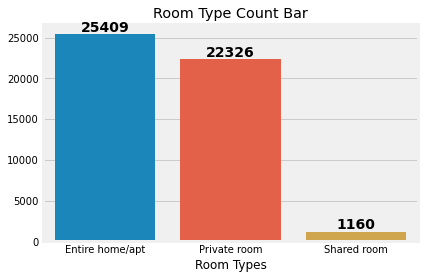

In [22]:
room_type_plot = sns.countplot(x="room_type", order = airbnb.room_type.value_counts().index, data=airbnb)
room_type_plot.set(xlabel='Room Types', ylabel='', title='Room Type Count Bar')
for bar in room_type_plot.patches:
    h = bar.get_height()
    room_type_plot.text(
        bar.get_x() + bar.get_width()/2.,  # bar index (x coordinate of text)
        h,                                 # y coordinate of text
        '%d' % int(h),                     # y label
        ha='center', 
        va='bottom',
        color='black',
        fontweight='bold',
        size=14)
    
plt.show()

According to the above graphic we can see that the most rented room type is the "Entire home/apartment" with a total count of 25.409 following by the "Private Room" and "Shared Room" with 22.326 and 1.160 respectively. It's obviously that all the people who rent an Airbnb prefer an entire home !

Percentage Representation of Neighbourhood Group in Pie

In [23]:
airbnb.neighbourhood_group.value_counts(dropna = False, normalize = True)

Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: neighbourhood_group, dtype: float64

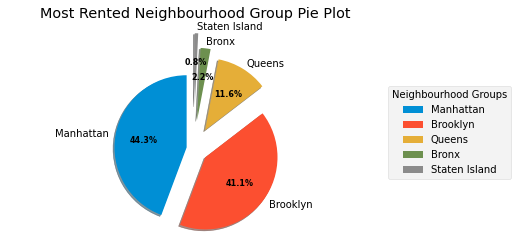

In [24]:
labels = airbnb.neighbourhood_group.value_counts().index
sizes = airbnb.neighbourhood_group.value_counts().values
explode = (0.1, 0.2, 0.3, 0.4, 0.6)

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                                   shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set(title="Most Rented Neighbourhood Group Pie Plot")
ax.legend(wedges, labels,
          title="Neighbourhood Groups",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
plt.show()

Neighbourhoods grouped by Neighbourhood Group in BarChart

In [25]:
for neighbourhood_group in airbnb.neighbourhood_group.unique():
    neighbourhoods = airbnb.neighbourhood[airbnb.neighbourhood_group == neighbourhood_group].unique()
    print("{} has {} Neighbourhoods: {}...\n".format(
        neighbourhood_group, 
        len(neighbourhoods), 
        neighbourhoods[:5]
    ))

Brooklyn has 47 Neighbourhoods: ['Kensington' 'Clinton Hill' 'Bedford-Stuyvesant' 'South Slope'
 'Williamsburg']...

Manhattan has 32 Neighbourhoods: ['Midtown' 'Harlem' 'East Harlem' 'Murray Hill' "Hell's Kitchen"]...

Queens has 51 Neighbourhoods: ['Long Island City' 'Woodside' 'Flushing' 'Sunnyside' 'Ridgewood']...

Staten Island has 43 Neighbourhoods: ['St. George' 'Tompkinsville' 'Emerson Hill' 'Shore Acres' 'Arrochar']...

Bronx has 48 Neighbourhoods: ['Highbridge' 'Clason Point' 'Eastchester' 'Kingsbridge' 'Woodlawn']...



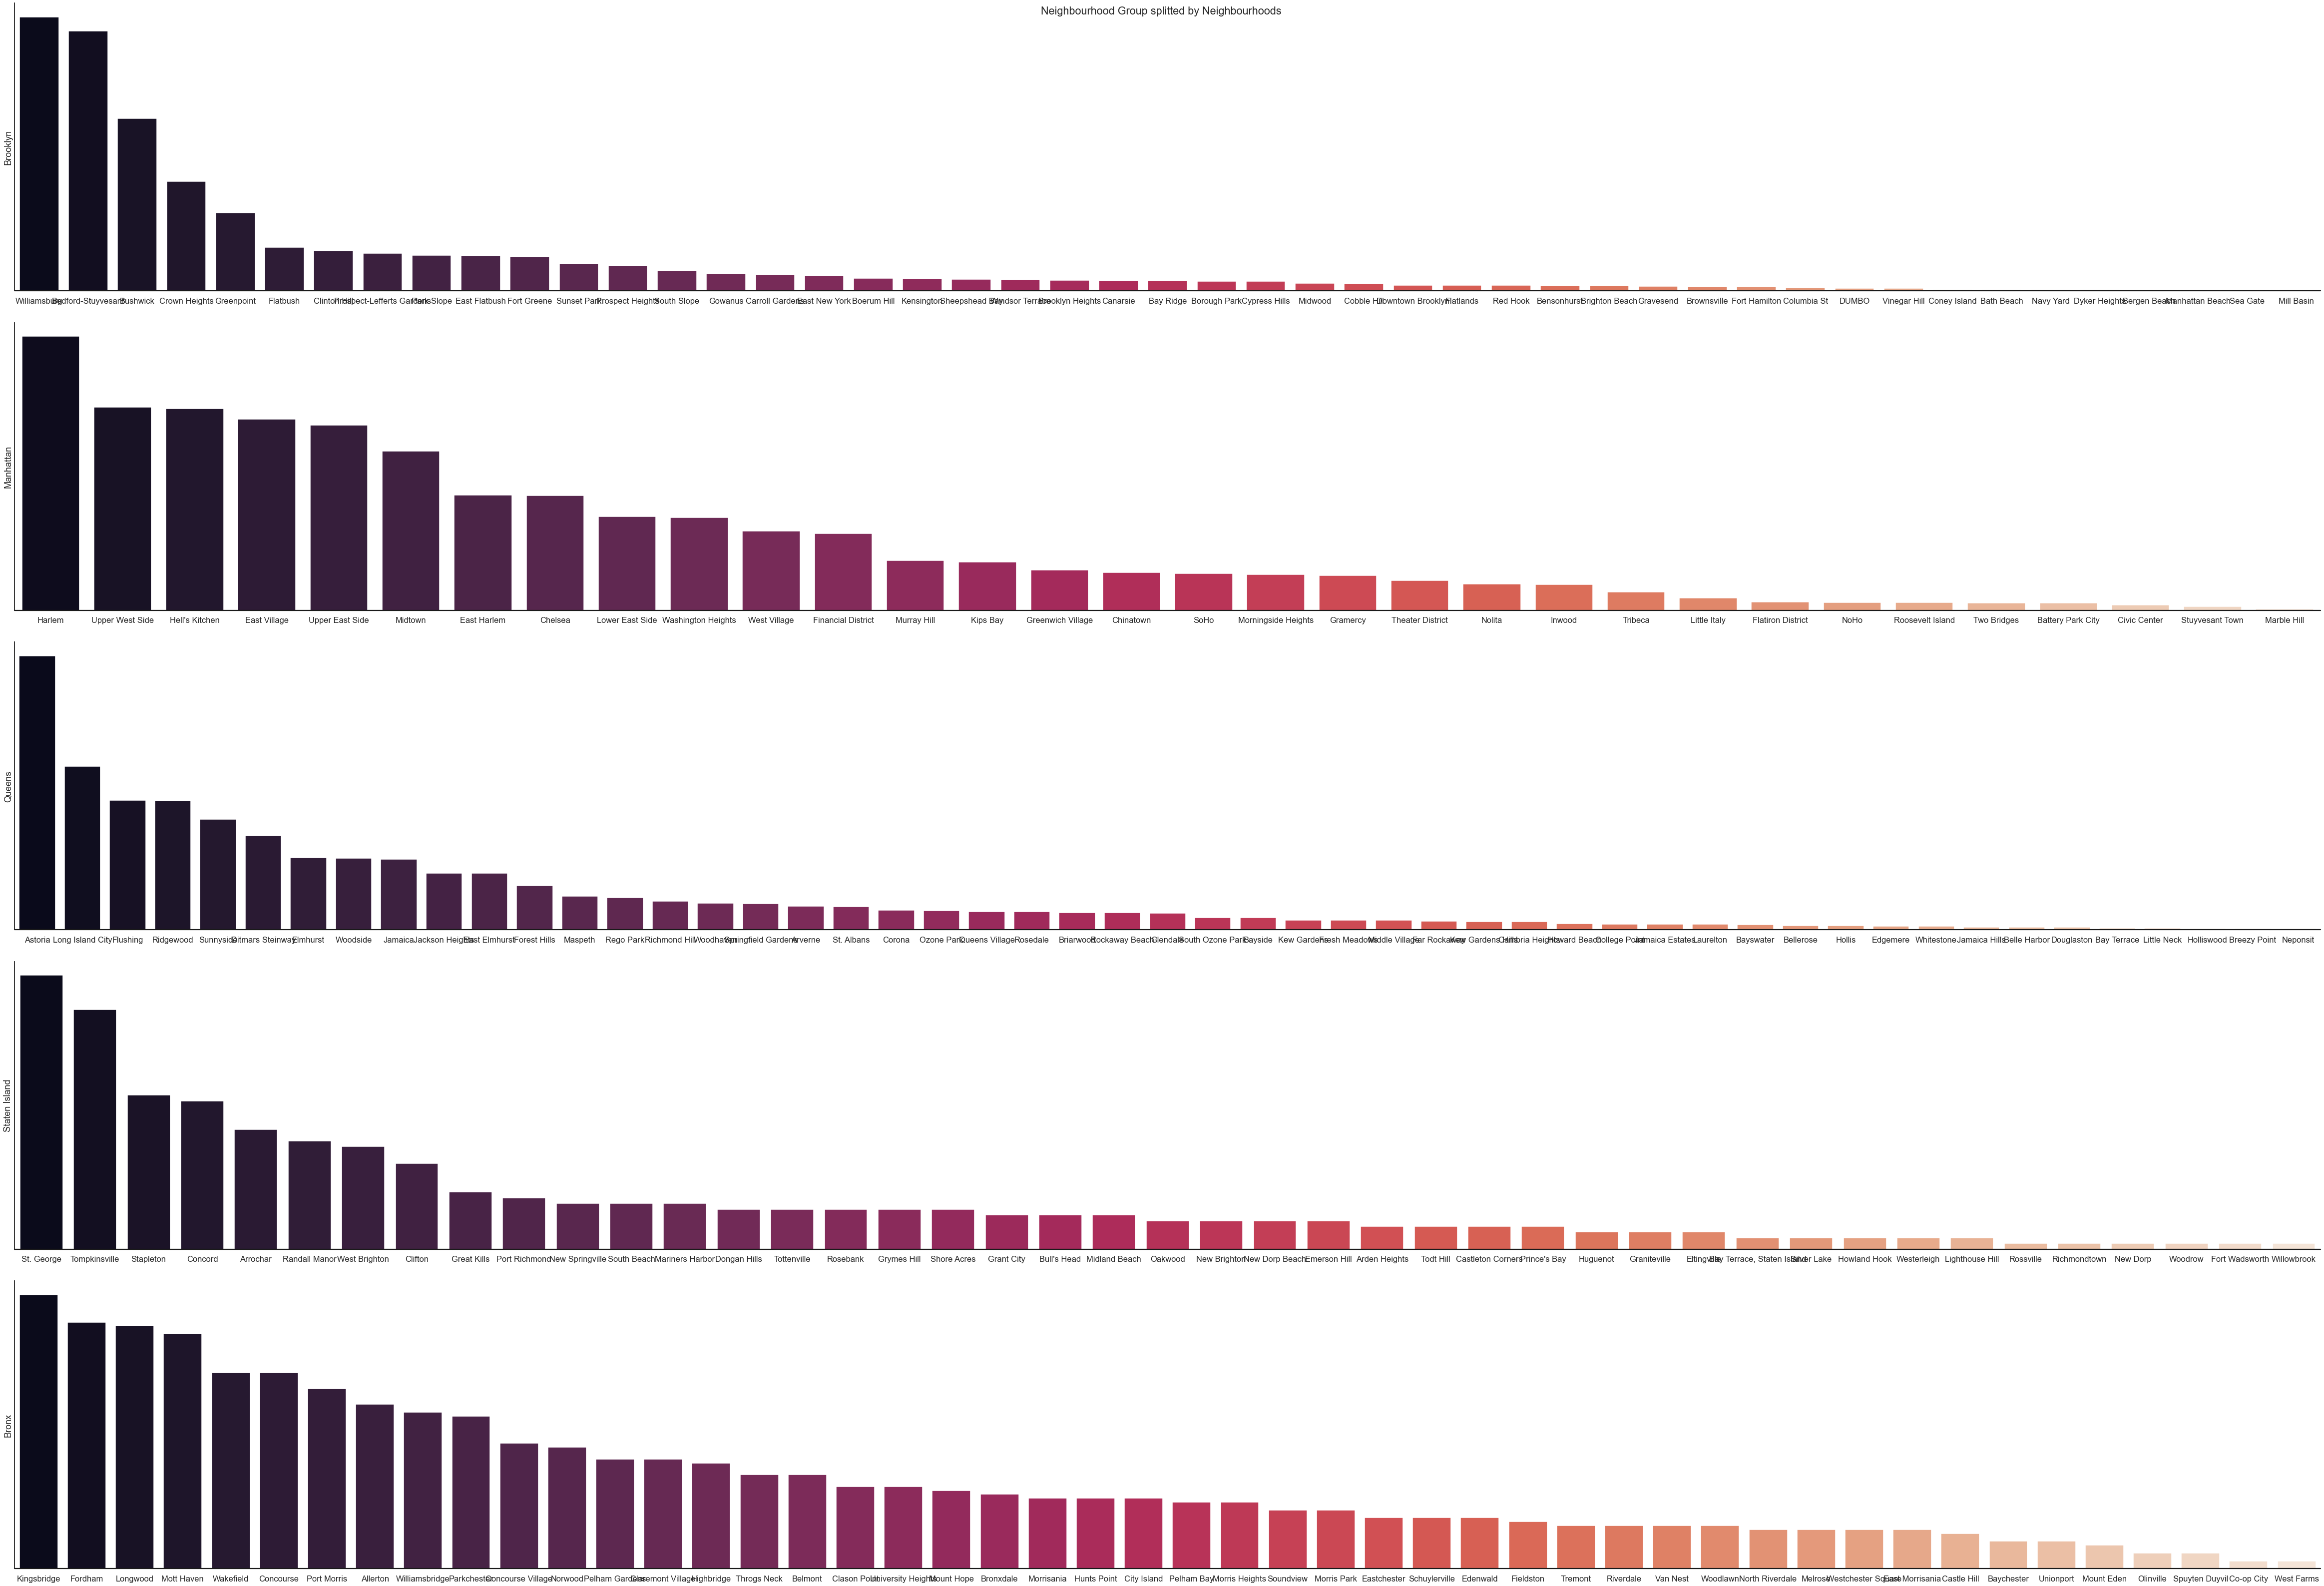

In [26]:
sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, subplots = plt.subplots(len(airbnb.neighbourhood_group.unique()), 1, figsize=(65, 45))

for i, neighbourhood_group in enumerate(airbnb.neighbourhood_group.unique()):
    neighbourhoods = airbnb.neighbourhood[airbnb.neighbourhood_group == neighbourhood_group]
    ax = subplots[i]
    x = np.array(neighbourhoods.value_counts().index)
    y = neighbourhoods.value_counts().values
    sns.barplot(x=x, y=y, palette="rocket", ax=ax)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_ylabel(neighbourhood_group)

# Finalize the plot
sns.despine(bottom=True)
f.suptitle('Neighbourhood Group splitted by Neighbourhoods ')
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
plt.show()

Given this graphic outputs we finally can see, that the most rented neighbourhood group is Manhattan 59,1 km² (44.4%) following by Brooklyn 180 km² (41.1%) and Queens 280 km² (11.6%). As we can see given the last results that as much surface has the neighbourhood group doesn't mean will have the most rented zone, moreover it's the smallest one !

For the other hand, given the graphic above (Neighbourhood Group splitted by Neighbourhoods) we finally came up that the most rented neighbourhoods are:

Williamsburg (Brooklyn).
Harlem (Manhattan).
Astoria (Queens).
St.George (Staten Island)
Kinsbridge (Bronx)

Density and Distribution of Prices for each Neighbourhood Group

<ipython-input-27-33e17e78dcbc>:16: UserWarning:

FixedFormatter should only be used together with FixedLocator



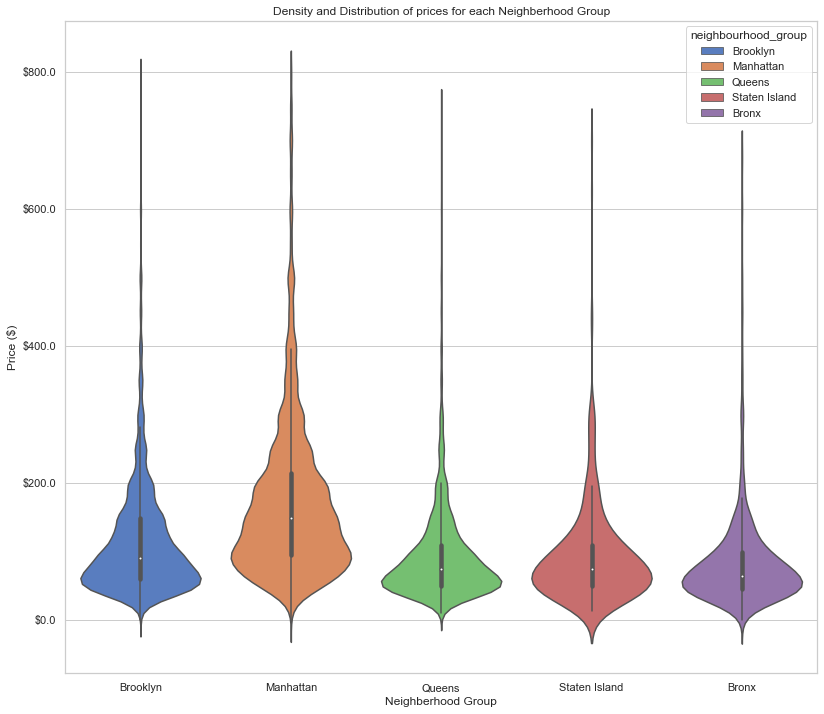

In [27]:
sns.set(style="whitegrid")
# Parameters
FILTER_PRICE_VALUE = 800

# Filter airbnb prices for shake of the visualization
sub_airbnb_price = airbnb[airbnb.price < FILTER_PRICE_VALUE]

# Create ViolinPlot
fig, ax = plt.subplots(figsize=(12, 12))
density_neigh_price_plot = sns.violinplot(ax=ax, x="neighbourhood_group", y="price", 
                                          hue="neighbourhood_group", data=sub_airbnb_price, 
                                          palette="muted", dodge=False)
density_neigh_price_plot.set(xlabel='Neighberhood Group', ylabel='Price ($)', 
                             title='Density and Distribution of prices for each Neighberhood Group')
ylabels = ['${}'.format(x) for x in density_neigh_price_plot.get_yticks()]
density_neigh_price_plot.set_yticklabels(ylabels)
plt.show()

According to the "Density and Distribution of prices for each Neighborhood Group" plot we can set up that the average of all the apartment & room prices are between 50$ - 200$, but is more remarkable for the average zones like: Queens, Staten Island and Bronx.

For the other hand, we can notice a slightly overpriced in Manhattan and Brooklyn neighborhood group, with the majority of density in prices between 200$ - 400$ it's definitely a difference if you are going to get a rent in the next days and you want to save your wallet!

We finally decide there is a notice over cost if you'd like to rent a room/apartment in the Manhattan neighbourhood group between 100$ - 600$.

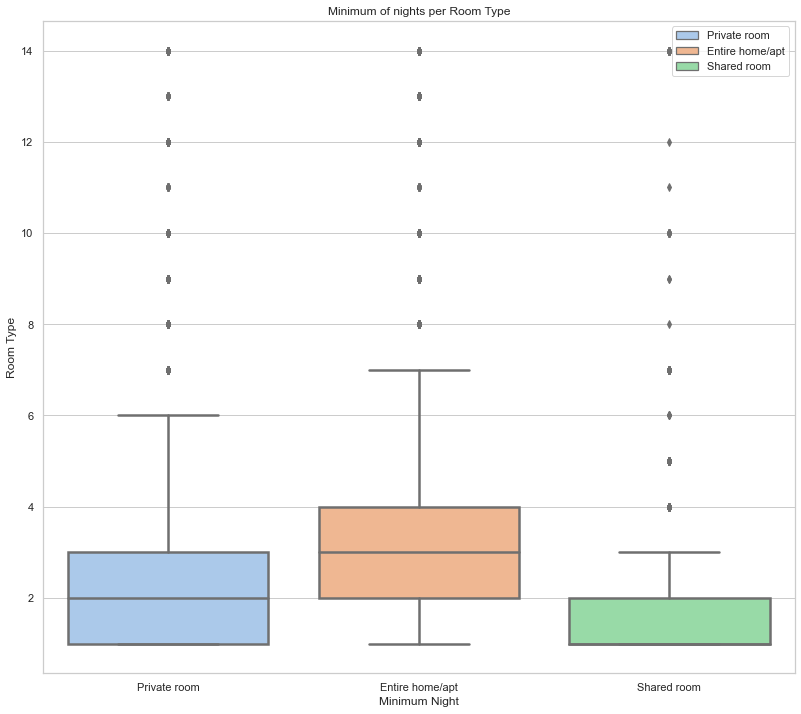

In [28]:
# Parameters
MINIMUM_NIGHTS_FILTER = 15      # Filter minimum nights to 2 weeks (15 days/nights)

# Data Preparation
sub_airbnb = airbnb[airbnb.minimum_nights < MINIMUM_NIGHTS_FILTER]

# BoxPlot Creation 
fig, ax = plt.subplots(figsize=(12, 12))
sns.set(style="ticks", palette="pastel")
nights_per_room = sns.boxplot(x="room_type", y="minimum_nights", ax=ax,
                              hue="room_type", dodge=False, linewidth=2.5,
                              data=sub_airbnb,)

nights_per_room.set(xlabel='Minimum Night', ylabel='Room Type', 
                             title='Minimum of nights per Room Type')
plt.legend(loc='upper right')
plt.show()

Distribution Price by Neighbourhood Groups

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:


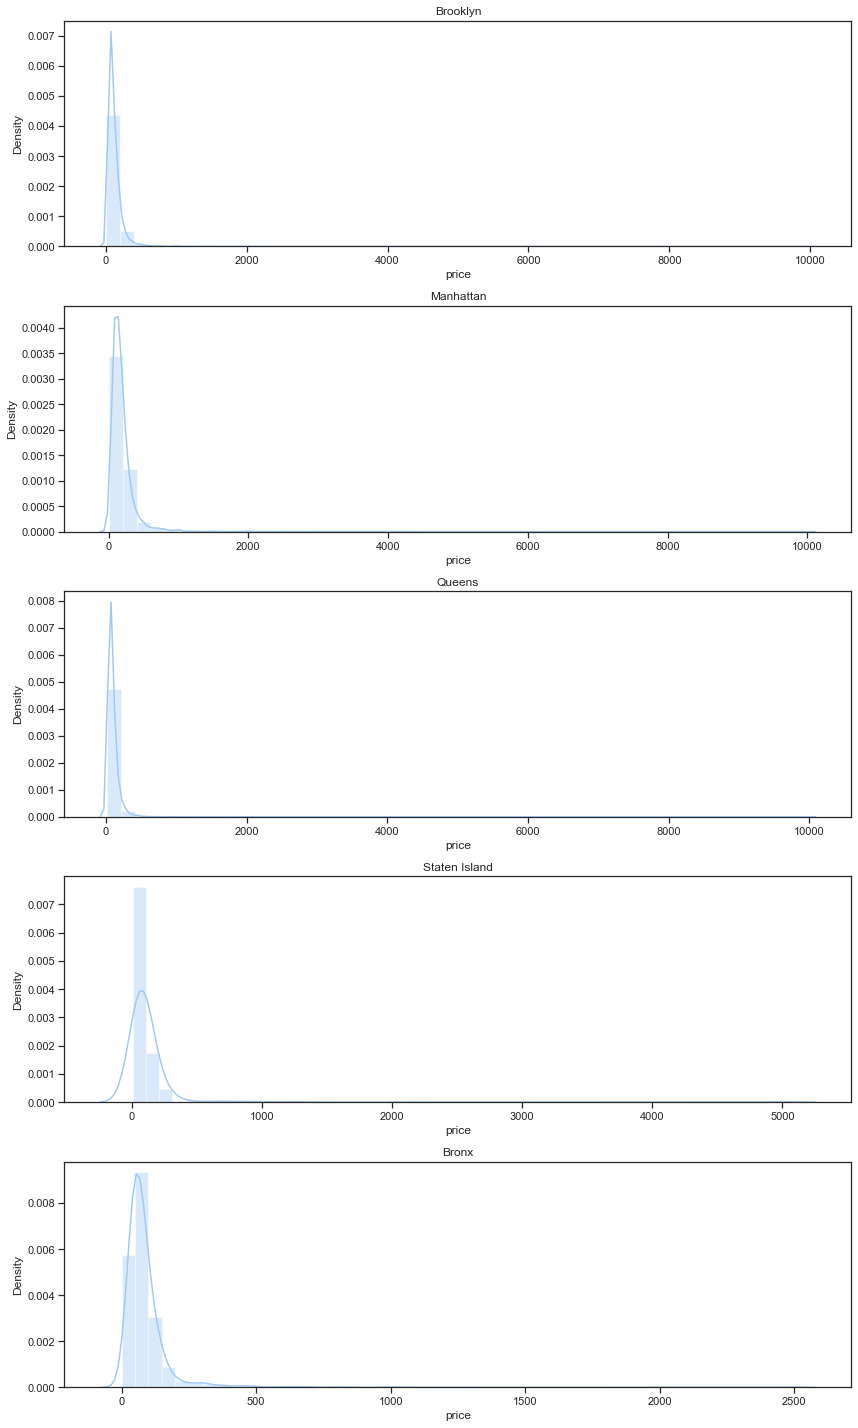

In [29]:
# Set up the matplotlib figure
f, subplots = plt.subplots(
                len(airbnb.neighbourhood_group.unique()), 
                figsize=(12, 20)
            )

for i, neighbourhood_group in enumerate(airbnb.neighbourhood_group.unique()):
    neighbourhoods = airbnb[airbnb.neighbourhood_group == neighbourhood_group]['price']
    ax = subplots[i]
    dist_plot = sns.distplot(neighbourhoods, ax=ax)
    dist_plot.set_title(neighbourhood_group)

# Finalize the plot
plt.tight_layout(h_pad=1)
plt.show()

As we can see, in our grid of distribution plots we already have the data distributed by price and splitted by Neighbourhood group, so according to the plot above we finally can determinate that:

Brooklyn averages around 70-500$ per night depending upon the neighbourhood.

Manhattan averages around 80-490$ ...

Queens averages around 60-280$...

Staten Island averages around 50-800$...

Bronx averages around 50-450$ ...

Number of reviews grouped by Host Id

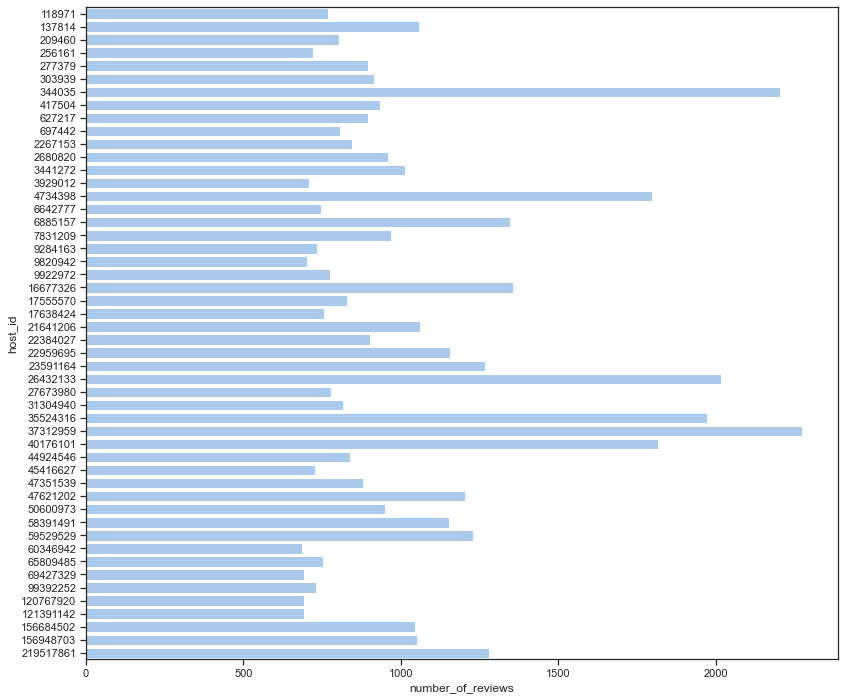

In [30]:
# Data Preparation
serie_airbnb = airbnb.groupby("host_id")["number_of_reviews"].agg("sum")
frame = { 'host_id': serie_airbnb.index, 'number_of_reviews': serie_airbnb.values }
df_airbnb = pd.DataFrame(frame).sort_values('number_of_reviews', ascending=False).head(50)

# BarPlot creation 
f, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x="number_of_reviews", y="host_id", 
            data=df_airbnb, color="b", ax=ax, orient="h")

# Add a legend and informative axis label
plt.show()

In [31]:
top_10_host_id = df_airbnb.host_id.unique()[:10]
names = airbnb.host_name[airbnb.host_id.isin(top_10_host_id)].unique()
names

array(['Jj', 'Randy', 'Alex And Zeena', 'Angela', 'Danielle',
       'Yasu & Akiko', 'Maya', 'Brooklyn&   Breakfast    -Len-', 'Brady',
       'Sonder (NYC)'], dtype=object)

Diagnostic Analysis

Diagnostic data analytics is the process of examining data to understand cause and event, or why something happened. It responds to questions like "WHAT HAPPENED", "WHY SOMETHING HAPPENED"... Techniques like drill-down, data discovery, data mining, and correlations are often employed. In particular, diagnostic data analytics help answer why something occurred. Organizations make use of this type of analytics as it creates more connections between data and identifies patterns of behavior.

Matrix Correlation (Table Visualization)

In [32]:
airbnb.corr().style.background_gradient(cmap='coolwarm')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,-0.072376,0.172028
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.225701,1.000000


HeatMap Correlation Visualization

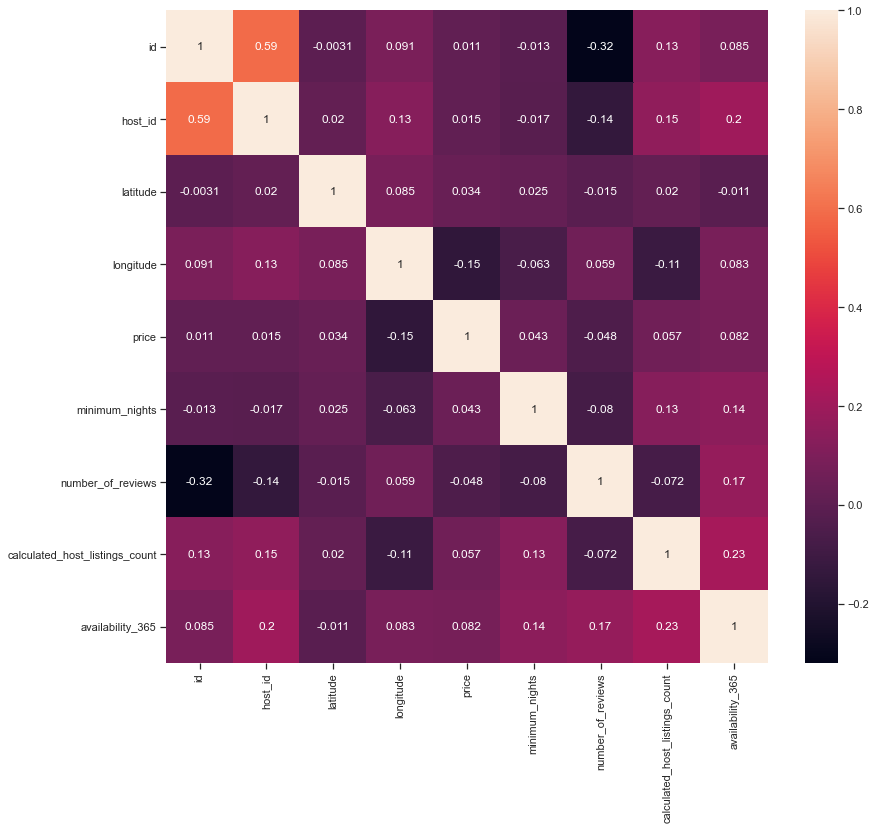

In [33]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(airbnb.corr(),annot=True)

Predictive Analysis

Predictive analysis is used to identify trends, correlations, and causation and attempts to answer the question “WHAT IS LIKE TO HAPPEN”. This type of analytics utilizes previous data to make predictions about future outcomes.

This type of analysis is another step up from the descriptive and diagnostic analyses. Predictive analysis uses the data we have summarized to make logical predictions of the outcomes of events. Predictive Analytics has different stages such as Data Modelling, Data Collection, Statistics and Deployment whereas Data Science has stages of Data Extraction, Data Processing, and Data Transformations to obtain some useful information out of it. There are many techniques used in Predictive Analytics such as Data mining, Artificial Intelligence, Machine learning, Statistics, and modeling etc., to analyze existing data to predict unknown events of future.

Predictions

The Prediction process should be iterate over these steps before get a stable output prediction:

Define project : Define the project outcomes, deliverable, scope of the effort, business goals, identify the data sets that are going to be used.

Data collection : Data mining for predictive analytics prepares data from multiple sources for analysis. This provides a complete view of customer interactions.

Data analysis : Data Analysis is the process of inspecting, cleaning and modelling data with the objective of discovering useful information, arriving at conclusion

Statistics : Statistical Analysis enables to confirm the assumptions, hypothesis and test them using standard statistical models.

Modelling : Predictive modelling provides the ability to automatically create accurate predictive models about future. There are also options to choose the best solution with multi-modal evaluation.

Deployment : Predictive model deployment provides the option to deploy the analytical results into everyday decision-making process to get results, reports and output by automating the decisions based on the modelling.

Model monitoring : Models are managed and monitored to review the model performance to make sure that it is providing the results expected.

In this case, we'll be focus on Price Predictions in order to dive into possible future prices based on real Airbnb's price data. Using Machine Learning techniques and with the power of Linear Regression Models & Decisions Tree algorithms between others. Also, introduce of latest ML Python packages to work with like Scikit Learn, Tensorflow...

Machine Learning

In [35]:
'''Read in airbnb from csv file & Preparing Data'''
airbnb=pd.read_csv('AB_NYC_2019.csv')

airbnb.drop(['name','id','host_name','last_review'],axis=1,inplace=True)
airbnb['reviews_per_month']=airbnb['reviews_per_month'].replace(np.nan, 0)

In [36]:
'''Encode labels with value between 0 and n_classes-1.'''
le = preprocessing.LabelEncoder()                                            # Fit label encoder
le.fit(airbnb['neighbourhood_group'])
airbnb['neighbourhood_group']=le.transform(airbnb['neighbourhood_group'])    # Transform labels to normalized encoding.

le = preprocessing.LabelEncoder()
le.fit(airbnb['neighbourhood'])
airbnb['neighbourhood']=le.transform(airbnb['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(airbnb['room_type'])
airbnb['room_type']=le.transform(airbnb['room_type'])

airbnb.sort_values(by='price',ascending=True,inplace=True)

airbnb.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
25796,86327101,1,13,40.68258,-73.91284,1,0,1,95,4.35,6,222
25634,15787004,1,28,40.69467,-73.92433,1,0,2,16,0.71,5,0
25433,131697576,0,62,40.83296,-73.88668,1,0,2,55,2.56,4,127
25753,1641537,1,91,40.72462,-73.94072,1,0,2,12,0.53,2,0
23161,8993084,1,13,40.69023,-73.95428,1,0,4,1,0.05,4,28


In [37]:
'''Reversing Labeling Transform'''
list(le.inverse_transform(airbnb['room_type']))[:10]

['Private room',
 'Private room',
 'Private room',
 'Private room',
 'Private room',
 'Private room',
 'Shared room',
 'Entire home/apt',
 'Private room',
 'Shared room']

Modeling

Linear Regression Model

In [38]:
'''Train LRM'''
lm = LinearRegression()

X = airbnb[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = airbnb['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)

LinearRegression()

In [39]:
'''Get Predictions & Print Metrics'''
predicts = lm.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts) * 100,
        mean_absolute_error(y_test,predicts)
        ))


        Mean Squared Error: 180.73409656936215
        R2 Score: 11.639576782324013
        Mean Absolute Error: 72.86091366825335
     


Gradient Boosted Regressor Model

Gradient Boosted (GB) builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [40]:
'''Gradient Boosted Regressor'''
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=3000)

In [41]:
'''Get Predictions & Metrics'''
predicts2 = GBoost.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts2)),
        r2_score(y_test,predicts2) * 100,
        mean_absolute_error(y_test,predicts2)
        ))


        Mean Squared Error: 175.5189669931828
        R2 Score: 16.66533178254167
        Mean Absolute Error: 63.94787959409026
     


Results

Predictions (Linear Regression Model)

Actual Values VS Predicted Values

In [43]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()}).head(20)

error_airbnb.head(5)

,Actual Values,Predicted Values
0,400,135.112125
1,140,210.599057
2,195,176.222978
3,120,100.439183
4,88,88.545753


In [44]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_airbnb.index, y=error_airbnb['Predicted Values']),
    go.Bar(name='Actual', x=error_airbnb.index, y=error_airbnb['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

Linear Model Predictions

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



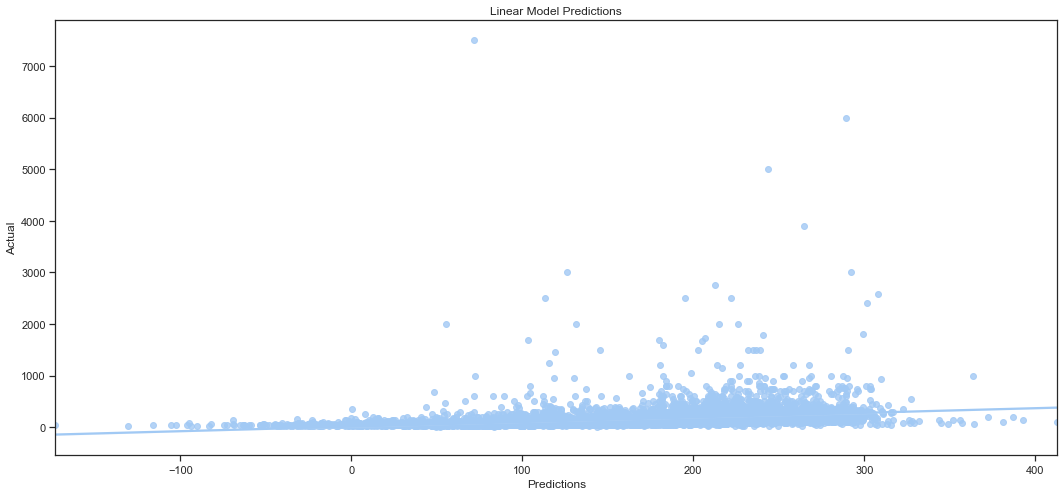

In [45]:
plt.figure(figsize=(16,8))
sns.regplot(predicts,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.grid(False)
plt.show()

Predictions 2 (Gradient Boosted Regressor Model)

Actual Values VS Predicted Values

In [46]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts2.flatten()}).head(20)

error_airbnb.head(5)

,Actual Values,Predicted Values
0,400,125.903567
1,140,156.575618
2,195,161.337522
3,120,94.543442
4,88,71.978409


In [47]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_airbnb.index, y=error_airbnb['Predicted Values']),
    go.Bar(name='Actual', x=error_airbnb.index, y=error_airbnb['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



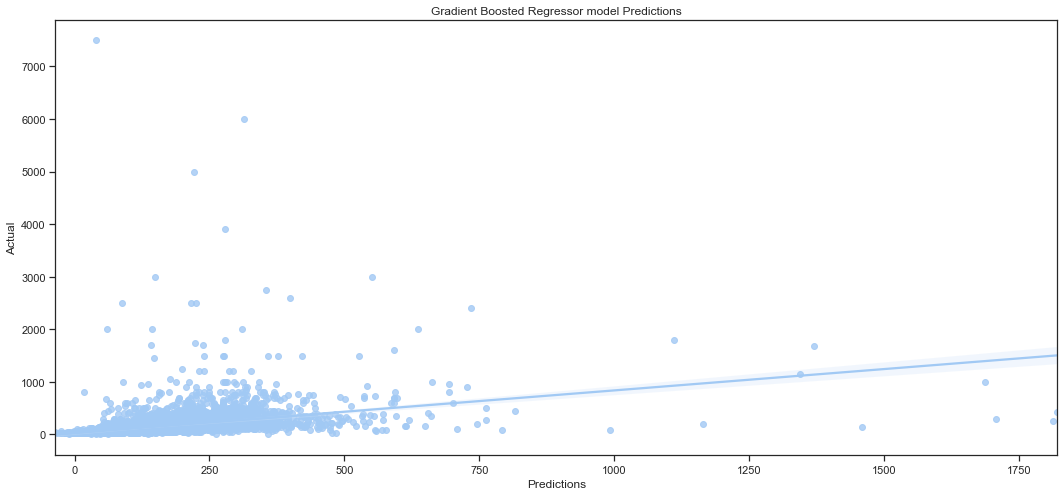

In [48]:
plt.figure(figsize=(16,8))
sns.regplot(predicts2,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Gradient Boosted Regressor model Predictions")
plt.show()

Conclusion

Summarizing our findings, suggesting other features

This Airbnb ('AB_NYC_2019.csv') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented.

First, we have been processing and transforming the dataset in order to clean and refine the data with actions like dropped duplications, replaced null values to standarized ones, remove columns and finally applied ETL process, then we analyzed from the most basics plots and graphics with visualizations like: "Number of Room Types Available" using Bar Plots, "Percentage Representation of Neighbourhood Group in Pie" using Pie Plot, "Density and Distribution of Prices for each Neighbourhood Group" using Violin Plot... Also, hosts that take good advantage of the Airbnb platform and provide the most listings; we found that our top host has 327 listings. After that, we proceeded with analyzing boroughs and neighborhood/neighborhood groups listing densities and what areas were more popular than another. Next, we put good use of our latitude and longitude columns and used to create a geographical heatmap color-coded by the price of listings. We found the most reviewed listings and analyzed some additional attributes. For our data exploration purposes, it also would be nice to have couple extra features, such as positive and negative numeric (0-5 stars) reviews or 0-5 star average review for each listing; addition of these features would help to find the best-reviewed hosts for NYC along with 'number_of_review' column that is provided. Further, we started Diagnostic Analysis section to shoe the most used tools of Data Scientists to see what happened and try to understand the past to take advantage in the future using "Matrix Correlation" or "Natural Processing Language" with Word Cloud showing us the most used words in, for example, the Airbnb name or reviews...

Lastly, we got into Predictive Analysis using the latest stack technology in order to predict the price of Airbnb's over the year. We have used Machine Learning as application of Artificial Intelligence (AI), and we also applied the most optimized and newest algorithms like: "Linear Regression Model" & "Gradient Boosted Regressor Model" where we got a positive results coming up with the generalized increase in prices in New York City.

Overall, we discovered a very good number of interesting relationships between features and explained each step of the process. This data analytics is very much mimicked on a higher level on Airbnb Data/Machine Learning team for better business decisions, control over the platform, marketing initiatives, implementation of new features and much more. 